In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
carer_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

hate_labels = {
    "hate": "hate",
    "noHate": "nohate"
}

sst2_labels = {
    0: "negative",
    1: "positive"
}

carer_labels_v = list(carer_labels.values())
hate_labels_v = list(hate_labels.values())
sst2_labels_v = list(sst2_labels.values())

In [3]:
carer_df = pd.read_csv('human_eval_carer.csv')
hate_df = pd.read_csv('human_eval_hate-speech.csv')
sst2_df = pd.read_csv('human_eval_sst2.csv')

for col in ["1", "2", "3", "4"]:
    carer_df[col] = carer_df[col].str.split().str[1].str.lower()
    hate_df[col] = hate_df[col].str.lower()
    sst2_df[col] = sst2_df[col].str.split().str[1].str.lower()
    
carer_df["label"] = carer_df["label"].map(carer_labels)
hate_df["label"] = hate_df["label"].map(hate_labels)
sst2_df["label"] = sst2_df["label"].map(sst2_labels)

In [4]:
display(carer_df)
display(hate_df)
display(sst2_df)

,Unnamed: 0,text,label,1,2,3,4
0,0,im feeling rotten and pretending it just aint so,sadness,sadness,sadness,sadness,sadness
1,1,i feel its sad but im okay with it im happy i ...,sadness,sadness,sadness,sadness,sadness
2,2,i feel the creative juices beginning to flow a...,joy,joy,joy,joy,joy
3,3,i see momo feel shy momo hmmm gt me heyy momo,fear,love,sadness,surprise,joy
4,4,im in such a happy mood today i feel almost de...,joy,joy,sadness,joy,joy
...,...,...,...,...,...,...,...
95,95,i feel that they ignored the systemic nature o...,sadness,anger,anger,anger,anger
96,96,i reckon you need to stop feeling bitter and b...,anger,anger,anger,anger,anger
97,97,i feel like i am in paradise kissing those swe...,joy,love,love,love,joy
98,98,ive been feeling afraid a lot lately,fear,fear,fear,fear,fear


,Unnamed: 0,text,label,1,2,3,4
0,0,"JAPs are a total hoot , each the center of the...",hate,hate,hate,hate,hate
1,1,"No, I 'm in Spanish class at school in Canada ...",nohate,nohate,nohate,nohate,nohate
2,2,My wife had to spend time at the UP Hospital i...,hate,hate,hate,nohate,nohate
3,3,so is tom still rambling on about putting up m...,nohate,hate,hate,nohate,hate
4,4,The holocaust never existed except in the mind...,hate,hate,nohate,hate,hate
...,...,...,...,...,...,...,...
95,95,Maybe you should look there or just move here ...,nohate,nohate,hate,nohate,nohate
96,96,Aragorn,nohate,nohate,nohate,nohate,nohate
97,97,And I 've told you why .,nohate,nohate,nohate,nohate,nohate
98,98,We have read almost all the DR. Seuss book 's ...,nohate,nohate,hate,nohate,nohate


,Unnamed: 0,sentence,label,1,2,3,4
0,0,it 's a stunning lyrical work of considerable ...,positive,positive,negative,positive,positive
1,1,"exciting and direct , with ghost imagery that ...",positive,positive,negative,positive,positive
2,2,the movie 's accumulated force still feels lik...,negative,negative,positive,negative,negative
3,3,a nightmare date with a half-formed wit done a...,negative,negative,negative,negative,negative
4,4,"at times , the suspense is palpable , but by t...",negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...
95,95,a coarse and stupid gross-out .,negative,negative,negative,negative,negative
96,96,well-nigh unendurable ... though the picture s...,negative,negative,negative,negative,negative
97,97,"the result is a gaudy bag of stale candy , som...",negative,negative,negative,negative,negative
98,98,"an entertaining , colorful , action-filled cri...",positive,positive,positive,positive,positive


# averaged dfs 

In [5]:
carer_cdf = pd.concat([
    carer_df[["label"]].assign(prediction=carer_df[col]) for col in ["1", "2", "3", "4"]
], ignore_index=True)

hate_cdf = pd.concat([
    hate_df[["label"]].assign(prediction=hate_df[col]) for col in ["1", "2", "3", "4"]
], ignore_index=True)

sst2_cdf = pd.concat([
    sst2_df[["label"]].assign(prediction=sst2_df[col]) for col in ["1", "2", "3", "4"]
], ignore_index=True)

In [6]:
display(carer_cdf)
display(hate_cdf)
display(sst2_cdf)

,label,prediction
0,sadness,sadness
1,sadness,sadness
2,joy,joy
3,fear,love
4,joy,joy
...,...,...
395,sadness,anger
396,anger,anger
397,joy,joy
398,fear,fear


,label,prediction
0,hate,hate
1,nohate,nohate
2,hate,hate
3,nohate,hate
4,hate,hate
...,...,...
395,nohate,nohate
396,nohate,nohate
397,nohate,nohate
398,nohate,nohate


,label,prediction
0,positive,positive
1,positive,positive
2,negative,negative
3,negative,negative
4,negative,negative
...,...,...
395,negative,negative
396,negative,negative
397,negative,negative
398,positive,positive


# accuracy

In [7]:
def calc_accuracies_df(df):
    accuracies = {}
    for col in ["1", "2", "3", "4"]:
        correct_predictions = (df[col] == df["label"]).sum()
        accuracy = correct_predictions / len(df)
        accuracies[col] = accuracy
    return accuracies

def calc_accuracies_cdf(df):
    accuracies = {}
    correct_predictions = (df["prediction"] == df["label"]).sum()
    accuracy = correct_predictions / len(df)
    accuracies["prediction"] = accuracy
    return accuracies

In [8]:
print(calc_accuracies_df(carer_df))
print(calc_accuracies_cdf(carer_cdf))

{'1': 0.49, '2': 0.3, '3': 0.54, '4': 0.51}
{'prediction': 0.46}


In [9]:
print(calc_accuracies_df(hate_df))
print(calc_accuracies_cdf(hate_cdf))

{'1': 0.76, '2': 0.55, '3': 0.84, '4': 0.77}
{'prediction': 0.73}


In [10]:
print(calc_accuracies_df(sst2_df))
print(calc_accuracies_cdf(sst2_cdf))

{'1': 0.9, '2': 0.56, '3': 0.94, '4': 0.92}
{'prediction': 0.83}


# classification report

In [11]:
def class_report_df(df, label_values):
    for col in ["1", "2", "3", "4"]:
            print(classification_report(df["label"], df[col], labels=label_values))
    
def class_report_cdf(df, label_values):
    print(classification_report(df["label"], df["prediction"], labels=label_values))

In [12]:
print(class_report_df(carer_df, carer_labels_v))
print("-"*50)
print(class_report_cdf(carer_cdf, carer_labels_v))

              precision    recall  f1-score   support

     sadness       0.64      0.62      0.63        29
         joy       0.76      0.46      0.57        35
        love       0.17      0.12      0.14         8
       anger       0.60      0.43      0.50        14
        fear       0.29      0.55      0.38        11
    surprise       0.14      0.67      0.24         3

    accuracy                           0.49       100
   macro avg       0.43      0.47      0.41       100
weighted avg       0.59      0.49      0.51       100

              precision    recall  f1-score   support

     sadness       0.44      0.28      0.34        29
         joy       0.50      0.29      0.36        35
        love       0.20      0.38      0.26         8
       anger       0.25      0.29      0.27        14
        fear       0.22      0.36      0.28        11
    surprise       0.08      0.33      0.12         3

    accuracy                           0.30       100
   macro avg       0.28

In [13]:
print(class_report_df(hate_df, hate_labels_v))
print("-"*50)
print(class_report_cdf(hate_cdf, hate_labels_v))

              precision    recall  f1-score   support

        hate       0.31      1.00      0.48        11
      nohate       1.00      0.73      0.84        89

    accuracy                           0.76       100
   macro avg       0.66      0.87      0.66       100
weighted avg       0.92      0.76      0.80       100

              precision    recall  f1-score   support

        hate       0.07      0.27      0.12        11
      nohate       0.87      0.58      0.70        89

    accuracy                           0.55       100
   macro avg       0.47      0.43      0.41       100
weighted avg       0.78      0.55      0.63       100

              precision    recall  f1-score   support

        hate       0.39      0.82      0.53        11
      nohate       0.97      0.84      0.90        89

    accuracy                           0.84       100
   macro avg       0.68      0.83      0.72       100
weighted avg       0.91      0.84      0.86       100

              preci

In [14]:
print(class_report_df(sst2_df, sst2_labels_v))
print("-"*50)
print(class_report_cdf(sst2_cdf, sst2_labels_v))

              precision    recall  f1-score   support

    negative       0.95      0.84      0.89        49
    positive       0.86      0.96      0.91        51

    accuracy                           0.90       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.90      0.90       100

              precision    recall  f1-score   support

    negative       0.54      0.78      0.63        49
    positive       0.62      0.35      0.45        51

    accuracy                           0.56       100
   macro avg       0.58      0.56      0.54       100
weighted avg       0.58      0.56      0.54       100

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94        49
    positive       0.94      0.94      0.94        51

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

              preci

In [15]:
def conf_matrix_df(df, label_values, header):
    for col in ["1", "2", "3", "4"]:
        cm = confusion_matrix(df["label"], df[col], labels=label_values)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_values)
        disp.plot()
        plt.title(f"Confusion Matrix - {header} #{col}")
        plt.show()

def conf_matrix_cdf(df, label_values, header):
    cm = confusion_matrix(df["label"], df["prediction"], labels=label_values)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_values)
    disp.plot()
    plt.title(f"Confusion Matrix - {header}")
    plt.show()

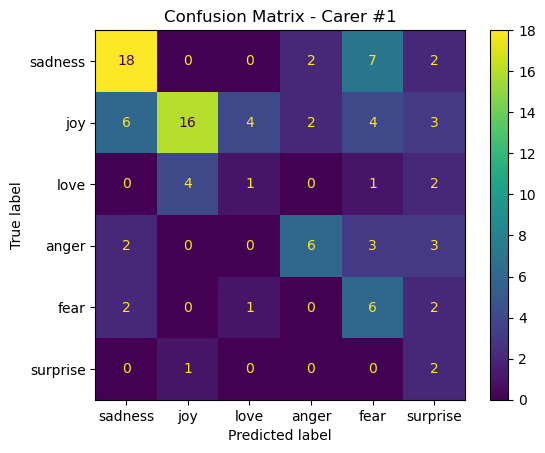

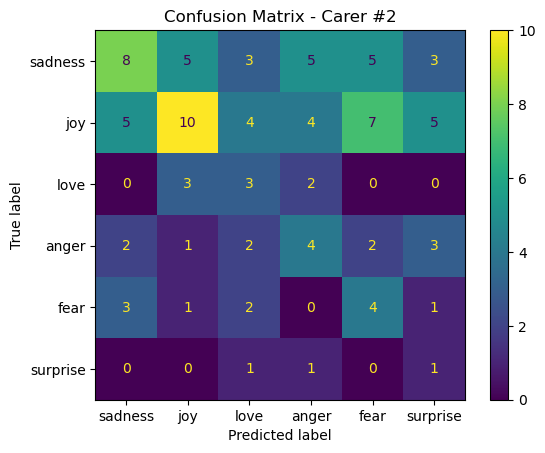

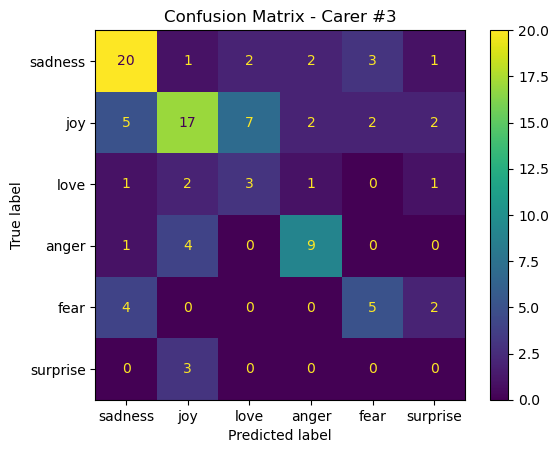

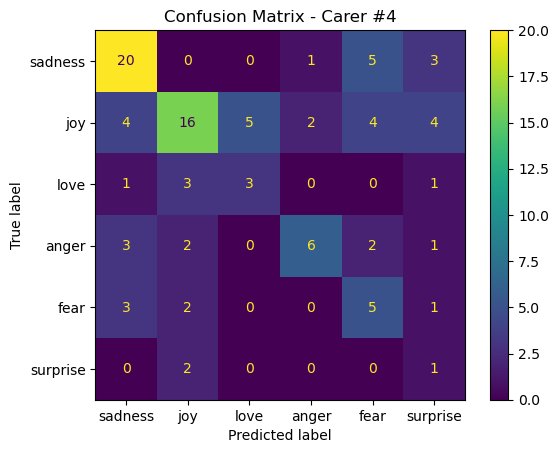

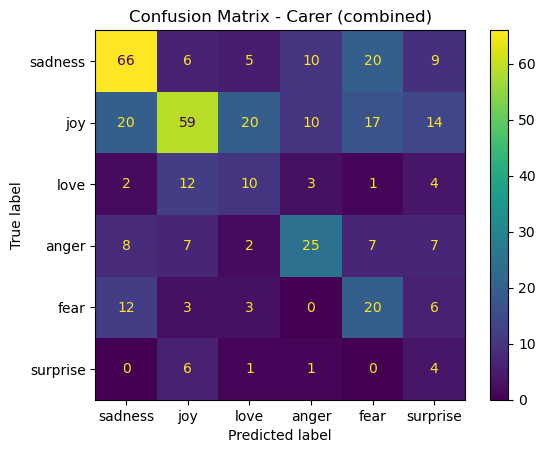

In [16]:
conf_matrix_df(carer_df, carer_labels_v, "Carer")
conf_matrix_cdf(carer_cdf, carer_labels_v, "Carer (combined)")

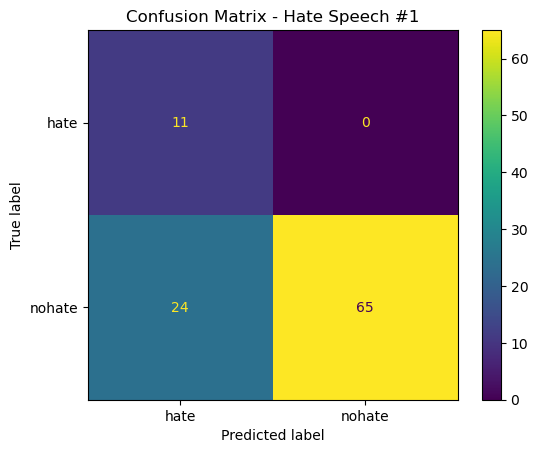

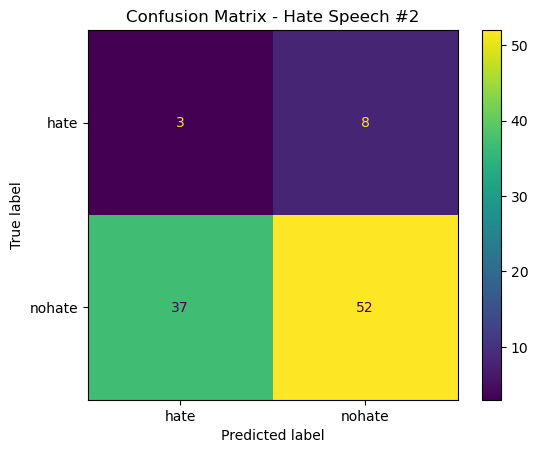

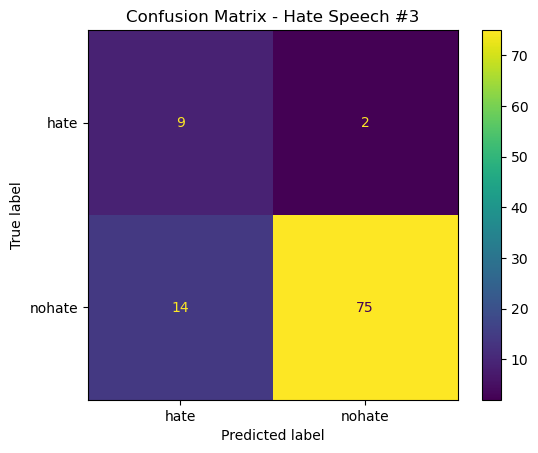

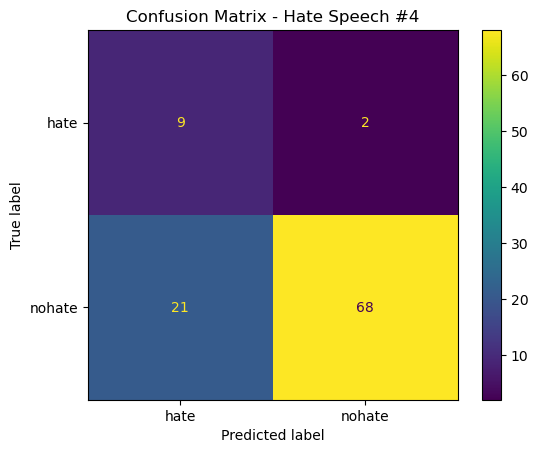

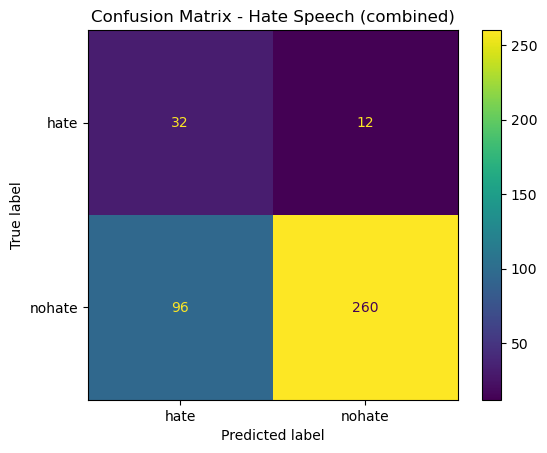

In [17]:
conf_matrix_df(hate_df, hate_labels_v, "Hate Speech")
conf_matrix_cdf(hate_cdf, hate_labels_v, "Hate Speech (combined)")

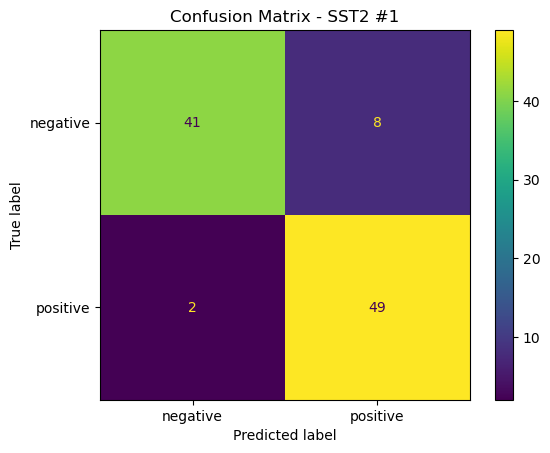

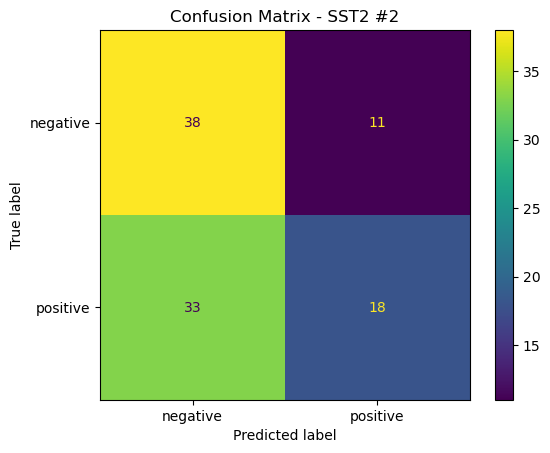

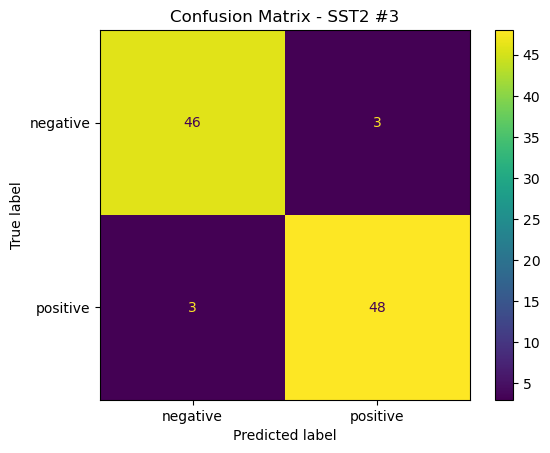

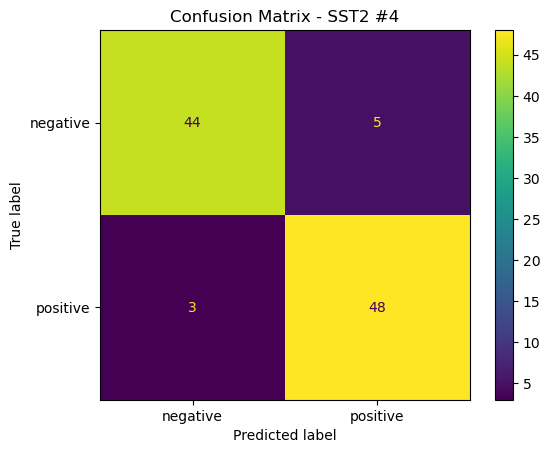

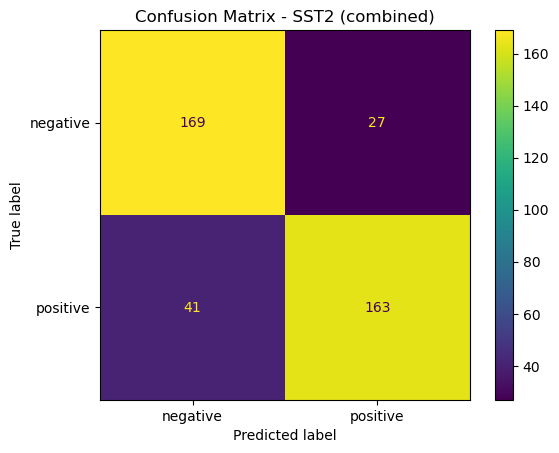

In [18]:
conf_matrix_df(sst2_df, sst2_labels_v, "SST2")
conf_matrix_cdf(sst2_cdf, sst2_labels_v, "SST2 (combined)")